In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import f1_score
warnings.simplefilter(action='ignore', category=FutureWarning)


In [39]:
df = pd.read_parquet('../data/clase_espectral.parquet')

In [41]:
df['Clase_espectral'].isnull().sum()

5107

In [42]:
# Crear el conjunto de entrenamiento (datos con valores de Tipo_espectral)
X_train = df[df['Clase_espectral'].notnull()][['B-V', 'V-I']]
y_train = df[df['Clase_espectral'].notnull()]['Clase_espectral']

# Crear el conjunto de prueba (datos con valores nulos en Tipo_espectral)
X_test = df[df['Clase_espectral'].isnull()][['B-V', 'V-I']]

# Escalar los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Creamos una instancia del encoder
le = LabelEncoder()

# Fit y transform en y_train
y_train = le.fit_transform(y_train)

In [44]:
# Imprimo las clases del encoder ya que posteriormente necesitaré saber a que otorgó cada valor.
print(le.classes_)

['A0' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'B0' 'B1' 'B2' 'B3'
 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'F0' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7'
 'F8' 'F9' 'G0' 'G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8' 'G9' 'K0' 'K1'
 'K2' 'K3' 'K4' 'K5' 'K6' 'K7' 'K8' 'K9' 'M0' 'M1' 'M2' 'M3' 'M4' 'M5'
 'M6' 'M7' 'M8' 'M9' 'O4' 'O5' 'O6' 'O7' 'O8' 'O9']


In [45]:
X = df[['B-V', 'V-I']]
y = df['Clase_espectral']

### REGRESIÓN LOGÍSTICA

In [46]:
logistic = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic.fit(X_train, y_train)
predictions_LR= logistic.predict(X_test)

logistic.score(X_train, y_train)

0.3262985269857384

### RANDOM FOREST

In [47]:
model_RF = RandomForestClassifier(n_estimators=10000, max_depth=6, random_state=41)
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)

model_RF.score(X_train, y_train)


0.357720878927794

###  K-Nearest-Neighbor

In [48]:
KNN_classifier = KNeighborsClassifier(n_neighbors=14)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(X_test)

KNN_classifier.score(X_train, y_train)


0.226408832228654

### Gradient Boosting


In [49]:
model_GB = GradientBoostingClassifier(min_samples_leaf=10,max_leaf_nodes=10)
model_GB.fit(X_train, y_train)
predictions_GB = model_GB.predict(X_test)

model_GB.score(X_train, y_train)


0.3639682555177025

### XGBoost

In [50]:
model_XGB = XGBClassifier(learning_rate=0.005, use_label_encoder=False, n_estimators=4000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.0006,
                       random_state=30)

model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(X_test)

model_XGB.score(X_train, y_train)

/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.3656765225540056

### Vemos las puntuaciones

In [51]:
print("Logistic Regression: ", logistic.score(X_train, y_train))
print("Random Forest: ", model_RF.score(X_train, y_train))
print("K-Nearest-Neighbor: ", KNN_classifier.score(X_train, y_train))
print("Gradient Boosting: ", model_GB.score(X_train, y_train))
print("XGBoost: ", model_XGB.score(X_train, y_train))
print("Mean: ", (logistic.score(X_train, y_train) + model_RF.score(X_train, y_train) + KNN_classifier.score(X_train, y_train) + model_GB.score(X_train, y_train) + model_XGB.score(X_train, y_train)) / 5)

Logistic Regression:  0.3262985269857384
Random Forest:  0.357720878927794
K-Nearest-Neighbor:  0.226408832228654
Gradient Boosting:  0.3639682555177025
XGBoost:  0.3656765225540056
Mean:  0.32801460324277887


### Guardamos los modelos

In [52]:
import pickle 

In [53]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/IndiceTipo_logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic, f)

In [54]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/IndiceTipo_RandomForest.pkl', 'wb') as f:
    pickle.dump(model_RF, f)

In [55]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/IndiceTipo_KNN.pkl', 'wb') as f:
    pickle.dump(KNN_classifier, f)

In [56]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/IndiceTipo_GradientBoost.pkl', 'wb') as f:
    pickle.dump(model_GB, f)

In [57]:
# Guardar el modelo entrenado en un archivo pkl
with open('../output/IndiceTipo_XGBoost.pkl', 'wb') as f:
    pickle.dump(model_XGB, f)

## Probando las predicciones del modelo XGBoost

In [58]:
# Hacemos predicciones con el modelo
y_pred = model_XGB.predict(X_test)

# Transformamos las predicciones a las etiquetas originales
y_pred_originales = le.inverse_transform(y_pred)

In [59]:
y_pred_originales

array(['K0', 'K0', 'G5', ..., 'F5', 'G5', 'M0'], dtype=object)

In [63]:

# Vmag = 8.4 
# BTmag = 8.44
# VTmag = 8.45
B_V = -1.2
V_I = -1
# Hpmag = 8.45
# V_I_red = 2.85
# d = 819.29
# T = 6302.58
# M_v = -1.16
# M_Hip = -1.12

# # Seleccionar las mismas características que se utilizaron para entrenar el modelo
# X_new = pd.DataFrame([[Vmag, BTmag, VTmag, B_V, V_I, Hpmag, V_I_red, d, T, M_v, M_Hip]], columns=['Vmag', 'BTmag', 'VTmag', 'B-V', 'V-I', 'Hpmag', '(V-I)red', 'd', 'T', 'M_v', 'M_Hip'])
X_new = pd.DataFrame([[B_V, V_I]], columns=['B-V', 'V-I'])

# Escalar los valores de las características utilizando el StandardScaler previamente entrenado
X_new_scaled = scaler.transform(X_new)

# Utilizar el modelo para predecir la clasificación de la estrella
y_pred = model_XGB.predict(X_new_scaled)

# Transformar la predicción a la etiqueta original utilizando el LabelEncoder previamente entrenado
y_pred_originales = le.inverse_transform(y_pred)

print("La clasificación de la estrella es:", y_pred_originales[0])


La clasificación de la estrella es: O8


### Dibujamos la curva de aprendizaje y vemos la evolución de las puntuaciones de entrenamiento y validación

/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/Users/enriquebook/Data_Analysis/myenv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

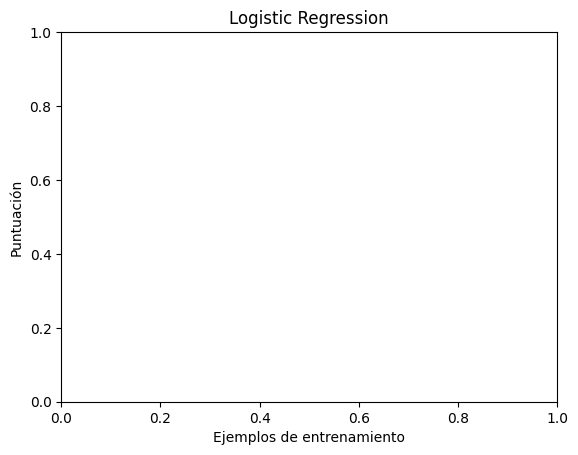

In [61]:
from sklearn.model_selection import learning_curve

learning_curve(logistic, X_train, y_train, cv=10, n_jobs=-1)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Ejemplos de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validación cruzada de los puntos de datos")

    plt.legend(loc="best")
    return plt

plot_learning_curve(logistic, "Logistic Regression", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_RF, "Random Forest", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(KNN_classifier, "K-Nearest-Neighbor", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_GB, "Gradient Boosting", X_train, y_train, cv=10, n_jobs=-1)
plot_learning_curve(model_XGB, "XGBoost", X_train, y_train, cv=10, n_jobs=-1)
     